In [106]:
import os
import pandas as pd

os.environ["R_HOME"] = r"C:/Users/Jake/Documents/Anaconda3/envs/analysis_env/Lib/R"

In [107]:
import pymer4

In [108]:
from pymer4.utils import get_resource_path

df = pd.read_csv(os.path.join(get_resource_path(), "sample_data.csv"))

In [110]:
df["IV1"][0] = np.nan
df

C:\Users\Jake\AppData\Local\Temp\ipykernel_6492\2446420111.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["IV1"][0] = np.nan


,Group,IV1,DV_l,DV,IV2,IV3
0,1,NaN,0,7.936508,4.563492,0.5
1,1,20.0,0,15.277778,0.000000,1.0
2,1,20.0,1,0.000000,0.000000,1.5
3,1,20.0,1,9.523810,0.000000,0.5
4,1,12.5,0,0.000000,0.000000,1.0
...,...,...,...,...,...,...
559,53,8.0,0,48.412698,13.492063,1.0
560,53,5.0,1,50.000000,70.039683,1.5
561,53,12.5,0,50.000000,69.047619,0.5
562,53,5.0,0,50.000000,71.626984,1.0


In [126]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey_result = pairwise_tukeyhsd(endog=df["DV"], groups=df["IV3"], alpha=0.05)
results_df = pd.DataFrame(
            data=tukey_result._results_table.data[1:],
            columns=tukey_result._results_table.data[0],
        )
results_df

,group1,group2,meandiff,p-adj,lower,upper,reject
0,0.5,1.0,-1.4629,0.8789,-8.8852,5.9593,False
1,0.5,1.5,-4.8815,0.2709,-12.3038,2.5408,False
2,1.0,1.5,-3.4186,0.5247,-10.8408,4.0037,False


In [111]:
from pymer4.models import Lmer

In [113]:
formula = "DV ~ IV1 + IV2 + (IV1:IV2) + (1|Group)"
model = Lmer(formula, data=df)
model.fit(summarize=True)

**NOTE**: Column for 'residuals' not created in model.data, but saved in model.resid only. This is because you have rows with NaNs in your data.

**NOTE** Column for 'fits' not created in model.data, but saved in model.fits only. This is because you have rows with NaNs in your data.

Linear mixed model fit by REML [’lmerMod’]
Formula: DV~IV1+IV2+(IV1:IV2)+(1|Group)

Family: gaussian	 Inference: parametric

Number of observations: 564	 Groups: {'Group': 47.0}

Log-likelihood: -2292.207 	 AIC: 4596.414

Random effects:

                 Name      Var     Std
Group     (Intercept)  328.168  18.115
Residual               150.490  12.267

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),10.538,2.450,18.627,4.127,202.976,2.554,0.011,*
IV1,0.059,-0.356,0.474,0.212,524.031,0.279,0.780,
IV2,0.634,0.512,0.755,0.062,551.721,10.203,0.000,***
IV1:IV2,0.000,-0.007,0.008,0.004,521.372,0.074,0.941,


In [115]:
model.coefs

,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),10.538420,2.449599,18.627240,4.127025,202.975520,2.553515,1.139824e-02,*
IV1,0.059138,-0.355655,0.473931,0.211633,524.030630,0.279436,7.800201e-01,
IV2,0.633505,0.511808,0.755202,0.062092,551.721102,10.202760,1.657600e-22,***
IV1:IV2,0.000281,-0.007172,0.007733,0.003802,521.372301,0.073776,9.412169e-01,


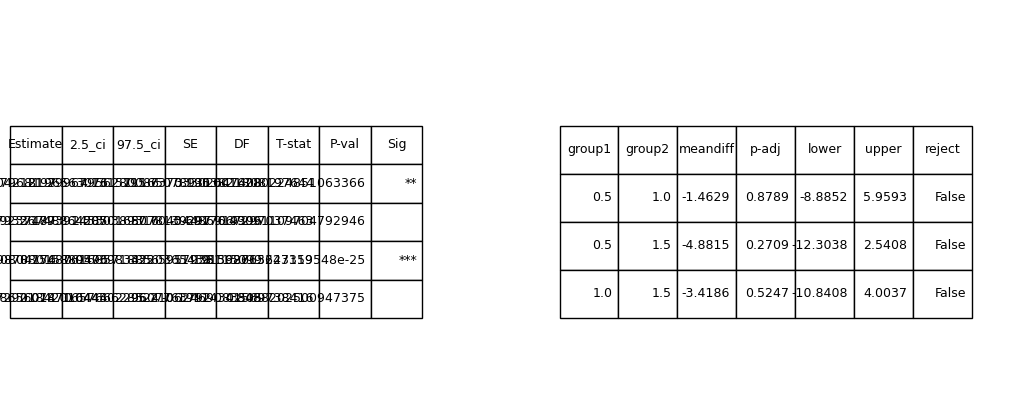

In [148]:
import matplotlib.pyplot as plt

fig, axes = plt.subplot_mosaic("""AB""", figsize=(13,5))
axes["A"].axis("off")
axes["A"].axis("tight")
table = axes["A"].table(
cellText=model.coefs.values,
    colLabels=model.coefs.columns,
    loc="center",
        bbox=[0, 0.2, 0.9, 0.5]
)
table.auto_set_font_size(False)
table.set_fontsize(9)

axes["B"].axis("off")
axes["B"].axis("tight")
tableb = axes["B"].table(
cellText=results_df.values,
    colLabels=results_df.columns,
    loc="center",
        bbox=[0, 0.2, 0.9, 0.5]
)
tableb.auto_set_font_size(False)
tableb.set_fontsize(9)

In [82]:
model.coefs

,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),46.950812,38.584343,55.317281,4.268685,60.646140,10.998893,4.453792e-16,***
IV3,-4.881515,-7.897468,-1.865562,1.538780,516.000001,-3.172329,1.602257e-03,**


In [87]:
import numpy as np
df = df.assign(IV4=df["IV3"].map({0.5: 0, 1.5: 2, 1.0: 1}))

In [88]:
df

,Group,IV1,DV_l,DV,IV2,IV3,IV4
0,1,20.0,0,7.936508,4.563492,0.5,0
1,1,20.0,0,15.277778,0.000000,1.0,1
2,1,20.0,1,0.000000,0.000000,1.5,2
3,1,20.0,1,9.523810,0.000000,0.5,0
4,1,12.5,0,0.000000,0.000000,1.0,1
...,...,...,...,...,...,...,...
559,53,8.0,0,48.412698,13.492063,1.0,1
560,53,5.0,1,50.000000,70.039683,1.5,2
561,53,12.5,0,50.000000,69.047619,0.5,0
562,53,5.0,0,50.000000,71.626984,1.0,1


In [89]:
new_model = Lmer("DV ~ IV4 + (1|Group)", data=df)
new_model.fit()

Linear mixed model fit by REML [’lmerMod’]
Formula: DV~IV4+(1|Group)

Family: gaussian	 Inference: parametric

Number of observations: 564	 Groups: {'Group': 47.0}

Log-likelihood: -2407.401 	 AIC: 4822.803

Random effects:

                 Name      Var     Std
Group     (Intercept)  726.582  26.955
Residual               222.577  14.919

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),44.510,36.562,52.458,4.055,49.493,10.976,0.000,***
IV4,-2.441,-3.949,-0.933,0.769,516.000,-3.172,0.002,**


In [90]:
new_model.coefs["P-val"]["IV4"]

0.0016022572742193392

In [118]:
data_dict = {"A": [1,1,1,1,1,1,1,np.nan], "B": [2,2,2,2,2,2,2,2], "C": [3,3,3,3,3,3,3,3]}
random_dict = {"A": ["a","a","a","b","b","b","c","c"], "B": ["a","a","a","b","b","b","c","c"], "C": ["a","a","a","b","b","b","c","c"]}

In [121]:
df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in data_dict.items()]))
new_df = df.dropna()
new_df

,A,B,C
0,1.0,2,3
1,1.0,2,3
2,1.0,2,3
3,1.0,2,3
4,1.0,2,3
5,1.0,2,3
6,1.0,2,3


In [117]:
df = pd.DataFrame.from_dict(data_dict)
df

,A,B,C
0,1,2,3
1,1,2,3
2,1,2,3
3,1,2,3
4,1,2,3
5,1,2,3
6,1,2,3
7,1,2,3


In [95]:
melted = pd.melt(df, value_vars=["A", "B", "C"], var_name="condition", value_name="data")
melted

,condition,data
0,A,1
1,A,1
2,A,1
3,A,1
4,A,1
5,A,1
6,A,1
7,A,1
8,B,2
9,B,2


In [96]:
rand_df = pd.DataFrame.from_dict(random_dict)
rand_melt = pd.melt(rand_df, value_vars=random_dict.keys(), var_name="condition", value_name="rand_var")
rand_melt

,condition,rand_var
0,A,a
1,A,a
2,A,a
3,A,b
4,A,b
5,A,b
6,A,c
7,A,c
8,B,a
9,B,a


,condition,data,rand_var,coded
0,A,1,a,-1
1,A,1,a,-1
2,A,1,a,-1
3,A,1,b,-1
4,A,1,b,-1
5,A,1,b,-1
6,A,1,c,-1
7,A,1,c,-1
8,B,2,a,0
9,B,2,a,0


In [97]:
melted["rand_var"] = rand_melt["rand_var"]

In [100]:
map_dict = {}
codes = list(range(len(data_dict.keys())))
for i, key in enumerate(data_dict.keys()):
    map_dict[key] = codes[i]
map_dict

{'A': 0, 'B': 1, 'C': 2}

In [103]:
melted = melted.assign(condition_coded=melted["condition"].map(map_dict))

In [104]:
melted

,condition,data,rand_var,coded,condition_coded
0,A,1,a,0,0
1,A,1,a,0,0
2,A,1,a,0,0
3,A,1,b,0,0
4,A,1,b,0,0
5,A,1,b,0,0
6,A,1,c,0,0
7,A,1,c,0,0
8,B,2,a,1,1
9,B,2,a,1,1


In [128]:
import pingouin as pg
data_wide = pg.read_dataset('rm_anova_wide')
data_wide

,Before,1 week,2 week,3 week
0,4.3,5.3,4.8,6.3
1,3.9,2.3,5.6,4.3
2,4.5,2.6,4.1,NaN
3,5.1,4.2,6.0,6.3
4,3.8,3.6,4.8,6.8
5,3.8,5.4,5.1,6.3
6,5.1,3.7,NaN,NaN
7,4.5,3.0,7.7,5.8
8,3.7,7.1,5.5,4.8
9,4.4,4.7,4.2,5.5


In [20]:
import numpy as np
dic = {"A": np.array([[1,2,3], [1,2,3]]), "B": np.array([[4,5,6], [4,5,6]]), "C": np.array([[7,8,9], [7,8,9]])}

#a = np.array(list(dic.values())).T
#a

In [32]:
b = [a, a, a]

In [71]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cross_decomposition import CCA
from sklearn.datasets import make_multilabel_classification
from sklearn.decomposition import PCA
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

X, Y = make_multilabel_classification(
    n_classes=2, n_labels=1, allow_unlabeled=True, random_state=1
)


In [72]:
Y = np.sum(Y, axis=1)

In [73]:
print(X.shape)
clf = SVC(kernel="linear", decision_function_shape="ovr")
clf.fit(X, Y)
clf.classes_

(100, 20)


array([0, 1, 2])

In [91]:
print(np.absolute(clf.coef_))

[[0.13418569 0.40619575 0.11037705 0.10382317 0.18625558 0.14934084
  0.00687356 0.12914657 0.27805468 0.22426652 0.09447902 0.24800176
  0.38493247 0.02395064 0.4272732  0.1159659  0.17354305 0.22170985
  0.2879687  0.16762868]
 [0.20427089 0.14474777 0.03605776 0.02603494 0.09765429 0.04059587
  0.12354008 0.04591832 0.16042547 0.25837996 0.02653085 0.12859221
  0.17667899 0.13150098 0.12503341 0.16577875 0.18354329 0.07729982
  0.08304424 0.08539537]
 [0.20394313 0.20668311 0.74707152 0.08285806 0.24124033 0.27659181
  0.25022729 0.27612131 0.0479723  0.1376085  0.11648287 0.08269198
  0.47503484 0.42648516 0.21969537 0.33902302 0.41472277 0.12806439
  0.02488806 0.17341448]]


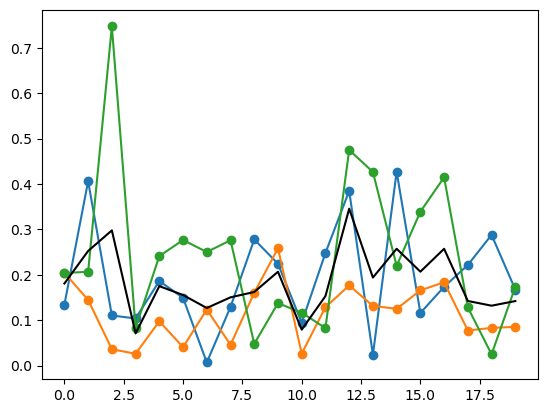

In [83]:
import matplotlib.pyplot as plt
for i in range(clf.coef_.shape[0]):
    plt.plot(np.absolute(clf.coef_[i, :]), marker="o", linestyle="-")
    
plt.plot(np.nanmean(np.absolute(clf.coef_), axis=0), color="black")

In [86]:
from sklearn.preprocessing import LabelEncoder
y = ["sLTP", "sLTP", "Stable", "sLTD", "Stable", "sLTD"]
le = LabelEncoder()
le.fit(y)

LabelEncoder()

In [87]:
coded = le.transform(y)
print(coded)

[2 2 0 1 0 1]


In [97]:
a = "distance_coactivity_rate"
if "distance_coactivity_rate" in a or"distrbution" in a:
    print("Present")

Present


In [99]:
a = np.array([1,1,1,1,2,2,2,2,3,3,3,3]).reshape(3,4)
d = {"A": a, "B": a, "C": a}

In [104]:
import pandas as pd
dfs = []
sub_count = 1
rm_vals = [1,2,3]
for key, value in d.items():
    for v in range(value.shape[1]):
        data=value[:, v]
        g = [key for x in range(len(data))]
        sub = [sub_count for x in range(len(data))]
        temp_dict = {"subject": sub, "data": data, "group": g, "rm_val": rm_vals}
        temp_df = pd.DataFrame(temp_dict)
        dfs.append(temp_df.dropna())
        sub_count = sub_count + 1
test_df = pd.concat(dfs)
test_df

,subject,data,group,rm_val
0,1,1,A,1
1,1,2,A,2
2,1,3,A,3
0,2,1,A,1
1,2,2,A,2
2,2,3,A,3
0,3,1,A,1
1,3,2,A,2
2,3,3,A,3
0,4,1,A,1


In [117]:
a = (1 < 0.05) *1
a

0

In [120]:
a = list(np.array(list(range(10))).astype(str))

In [121]:
a

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [124]:
a = np.array([1,2,3,4])
d = {"a": a.reshape(-1,1), "b": a.reshape(-1,1)}

In [127]:
c = list(d.values())
10 - np.nanmean(np.nan)

C:\Users\Jake\AppData\Local\Temp\ipykernel_6492\2301128095.py:2: RuntimeWarning: Mean of empty slice
  10 - np.nanmean(np.nan)


nan

In [129]:
position_bins = np.array([5, 10, 15, 20, 25, 30, 35, 40])
cluster_dist=10
DISTANT_BIN = 35

near_bin_idx = np.nonzero(position_bins == cluster_dist)[0][0]
dist_bin_idx = np.nonzero(position_bins >= DISTANT_BIN)[0][0]

In [160]:
a = np.array([2,3,4,5,6,7])
b = np.array([1,2,3,4,5,6])

In [161]:
c = np.vstack([a,b])
c

array([[2, 3, 4, 5, 6, 7],
       [1, 2, 3, 4, 5, 6]])

In [163]:
np.nanmean(c, axis=1)

array([4.5, 3.5])

In [141]:
a = ["A", "B", "C", "A", "A", "C"]
b = ["a", "a", "c", "b", "b", "b"]



In [145]:
a_i = [i for i,x in enumerate(a) if x=="A"]
b_i = [i for i,x in enumerate(b) if x=="b"]

In [144]:
a_i

[0, 3, 4]

In [146]:
b_i

[3, 4, 5]

In [149]:
np.intersect1d(a_i, b_i)

array([3, 4])

In [168]:
a = np.array([0, 1,1,1, 0, 0])

In [169]:
set(a)

{0, 1}

In [208]:
a = ["A", "A", "B", "C"]
c = np.array([0,0,0,1,1,2,2])
b = np.zeros(len(c)).astype(int)

b[np.where(c==1)] = 10
print(b)

[ 0  0  0 10 10  0  0]


In [209]:
idxs = np.array([0,4,0,0,0,0,0])
print(idxs)

[0 4 0 0 0 0 0]


In [212]:
np.vstack((b, idxs)).T

array([[ 0,  0],
       [ 0,  4],
       [ 0,  0],
       [10,  0],
       [10,  0],
       [ 0,  0],
       [ 0,  0]])

In [207]:
a = []
b = [1,2,3]

a + b

[1, 2, 3]